In [114]:
%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt



In [186]:
athlete_bio = Path("Olympic_Athlete_Bio.csv")
event_results = Path("Olympic_Athlete_Event_Results.csv")
medal_tally = Path("Olympic_Games_Medal_Tally.csv")
results = Path("Olympic_Results.csv")
country = Path("Olympics_Country.csv")
games = Path("Olympics_Games.csv")



In [187]:
bio_data = pd.read_csv(athlete_bio)
events_results_data = pd.read_csv(event_results)
medal_data = pd.read_csv(medal_tally)
results_data = pd.read_csv(results)
country_data = pd.read_csv(country)
games_data = pd.read_csv(games)


In [188]:
results_data.head(2)

,result_id,event_title,edition,edition_id,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description
0,30359,"Super-Heavyweight (>105 kilograms), Men",2004 Summer Olympics,26,Weightlifting,/editions/26/sports/WLF,"25 August 2004 — 16:30 (B), 20:00 (A)","Olympiako Gymnastirio Arsis Varon Nikaias, Nikaia",17 from 15 countries,Total of best lifts in snatch and clean & jerk...,na,"Not so much a competition as a coronation, the..."
1,1626,"Giant Slalom, Women1",1998 Winter Olympics,46,Snowboarding,/editions/46/sports/SBD,9 February 1998,"Mt. Yakebitai, Shiga Kogen, Yamanouchi",31 from 14 countries,"Two runs, total time determined placement.",Gates: 38 / 36Length: 936 mStart Altitude: 196...,The women’s giant slalom was postponed one day...


In [ ]:
columns_to_drop = ['sport_url', 'result_date','result_location','result_format','result_detail','result_description']
result_data_drop = results_data.drop(columns_to_drop, axis=1)
result_data_drop

In [ ]:
events_results_data.head(-10)


In [190]:
ev_r_to_drop = ['pos','isTeamSport','edition','edition_id','country_noc','athlete','medal','sport','event']
events_results_data_drop = events_results_data.drop(ev_r_to_drop, axis=1)
events_results_data_drop

,result_id,athlete_id
0,56265,64710
1,56313,64756
2,56338,64808
3,56338,922519
4,56338,64735
...,...,...
316829,19019671,148662
316830,19019671,138683
316831,19019671,137542
316832,19019671,128682


In [191]:
final_result_df = pd.merge(events_results_data_drop, result_data_drop, on='result_id', how='inner')
final_result_df

,result_id,athlete_id,event_title,edition,edition_id,sport,result_participants
0,56265,64710,"100 metres, Men",1908 Summer Olympics,5,Athletics,60 from 16 countries
1,56313,64756,"400 metres, Men",1908 Summer Olympics,5,Athletics,38 from 11 countries
2,56338,64808,"800 metres, Men",1908 Summer Olympics,5,Athletics,38 from 11 countries
3,56338,922519,"800 metres, Men",1908 Summer Olympics,5,Athletics,38 from 11 countries
4,56338,64735,"800 metres, Men",1908 Summer Olympics,5,Athletics,38 from 11 countries
...,...,...,...,...,...,...,...
316725,19019671,148662,"Monobob, Women",2022 Winter Olympics,62,Bobsleigh,20 from 16 countries
316726,19019671,138683,"Monobob, Women",2022 Winter Olympics,62,Bobsleigh,20 from 16 countries
316727,19019671,137542,"Monobob, Women",2022 Winter Olympics,62,Bobsleigh,20 from 16 countries
316728,19019671,128682,"Monobob, Women",2022 Winter Olympics,62,Bobsleigh,20 from 16 countries


In [192]:
winner_olympic = pd.merge(bio_data,final_result_df, on='athlete_id', how='inner')
winner_olympic.head(5)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,result_id,event_title,edition,edition_id,sport,result_participants
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62051,"4 x 400 metres Relay, Women",1976 Summer Olympics,19,Athletics,44 from 11 countries
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62530,"4 x 400 metres Relay, Women",1980 Summer Olympics,20,Athletics,47 from 11 countries
2,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,258676,"Beach Volleyball, Women",2008 Summer Olympics,53,Beach Volleyball,48 from 17 countries
3,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,257228,"10,000 metres, Men",2008 Summer Olympics,53,Athletics,38 from 20 countries
4,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN,70092,"Individual All-Around, Men",1932 Summer Olympics,10,Artistic Gymnastics,24 from 5 countries


In [194]:
winner_olympic.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,result_id,event_title,edition,edition_id,sport,result_participants
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62051,"4 x 400 metres Relay, Women",1976 Summer Olympics,19,Athletics,44 from 11 countries
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62530,"4 x 400 metres Relay, Women",1980 Summer Olympics,20,Athletics,47 from 11 countries


In [198]:
# Load your dataset into a Pandas DataFrame
winner_olympic

# Create new columns for 'year' and 'season'
winner_olympic['year'] = ''
winner_olympic['season'] = ''

# Iterate through each row and split the 'edition' column
for index, row in winner_olympic.iterrows():
    edition_parts = row['edition'].split()
    winner_olympic.at[index, 'year'] = edition_parts[0]
    winner_olympic.at[index, 'season'] = edition_parts[1]

# Display the updated DataFrame
winner_olympic.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,result_id,event_title,edition,edition_id,sport,result_participants,year,season
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62051,"4 x 400 metres Relay, Women",1976 Summer Olympics,19,Athletics,44 from 11 countries,1976,Summer
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62530,"4 x 400 metres Relay, Women",1980 Summer Olympics,20,Athletics,47 from 11 countries,1980,Summer


In [202]:
# Filter data for Summer Olympics
summer_data = winner_olympic[winner_olympic['season'] == 'Summer']
summer_data


,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,result_id,event_title,edition,edition_id,sport,result_participants,year,season
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62051,"4 x 400 metres Relay, Women",1976 Summer Olympics,19,Athletics,44 from 11 countries,1976,Summer
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,62530,"4 x 400 metres Relay, Women",1980 Summer Olympics,20,Athletics,47 from 11 countries,1980,Summer
2,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,258676,"Beach Volleyball, Women",2008 Summer Olympics,53,Beach Volleyball,48 from 17 countries,2008,Summer
3,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,257228,"10,000 metres, Men",2008 Summer Olympics,53,Athletics,38 from 20 countries,2008,Summer
4,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN,70092,"Individual All-Around, Men",1932 Summer Olympics,10,Artistic Gymnastics,24 from 5 countries,1932,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316718,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,64103,"4 x 400 metres Relay, Men",1992 Summer Olympics,23,Athletics,102 from 24 countries,1992,Summer
316719,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,64676,"400 metres, Men",1996 Summer Olympics,24,Athletics,62 from 42 countries,1996,Summer
316720,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,64790,"4 x 400 metres Relay, Men",1996 Summer Olympics,24,Athletics,151 from 35 countries,1996,Summer
316721,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,65353,"400 metres, Men",2000 Summer Olympics,25,Athletics,68 from 44 countries,2000,Summer


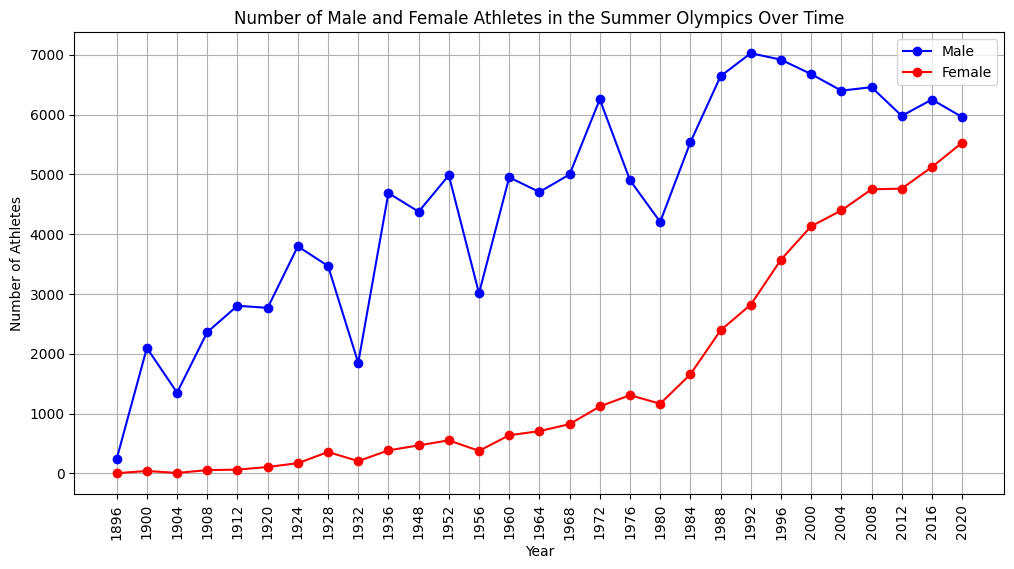

In [204]:
# Group data by year and gender to count unique athletes
gender_per_year = summer_data.groupby(['year', 'sex'])['name'].nunique().unstack()

# Create a line chart for the number of male and female athletes over time
plt.figure(figsize=(12, 6))
plt.plot(gender_per_year.index, gender_per_year['Male'], marker='o', color='b', label='Male')
plt.plot(gender_per_year.index, gender_per_year['Female'], marker='o', color='r', label='Female')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Male and Female Athletes in the Summer Olympics Over Time')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [209]:
women_participated_games = summer_data[summer_data['sex'] == 'Female']['sport'].unique()
print(women_participated_games)

['Athletics' 'Beach Volleyball' 'Cycling Mountain Bike' 'Swimming'
 'Shooting' 'Tennis' 'Taekwondo' 'Rowing' 'Art Competitions'
 'Modern Pentathlon' 'Hockey' 'Archery' 'Artistic Gymnastics'
 'Artistic Swimming' 'Triathlon' 'Volleyball' 'Sailing' 'Trampolining'
 'Marathon Swimming' 'Handball' 'Judo' 'Karate' 'Rugby Sevens' 'Golf'
 'Basketball' 'Weightlifting' 'Canoe Sprint' 'Cycling Road' 'Football'
 'Rhythmic Gymnastics' 'Softball' 'Fencing' 'Badminton'
 'Equestrian Eventing' 'Water Polo' '3x3 Basketball' 'Table Tennis'
 'Cycling Track' 'Skateboarding' 'Waterskiing' 'Equestrian Dressage'
 'Diving' 'Equestrian Jumping' 'Basque pelota' 'Wrestling' 'Boxing'
 'Croquet' 'Bowling' 'Canoe Slalom' 'Alpinism' 'Cycling BMX Racing'
 'Cycling BMX Freestyle' 'Korfball' 'Wushu' 'Figure Skating' 'Surfing'
 'Ballooning' 'Kendo' 'Sport Climbing' 'Motorboating' 'Gliding']


In [213]:
# Filter the dataset to include only female athletes
female_athletes = summer_data[summer_data['sex'] == 'Female']

# Extract unique combinations of Games and Year
women_participated_years = female_athletes[['sport', 'year']].drop_duplicates()

print(women_participated_years)

                        sport  year
0                   Athletics  1976
1                   Athletics  1980
2            Beach Volleyball  2008
12           Beach Volleyball  2020
29      Cycling Mountain Bike  2020
...                       ...   ...
252534                Sailing  1908
265934                 Rowing  1900
274397                Sailing  1976
283763                Gliding  1936
313833       Art Competitions  1920

[505 rows x 2 columns]


In [214]:
# Count the number of occurrences for each year
year_counts = women_participated_years['year'].value_counts().sort_index()
year_counts

year
1896     1
1900     8
1904     1
1908     6
1912     4
1920     8
1924     6
1928     8
1932     5
1936     9
1948     7
1952     9
1956     6
1960     9
1964    12
1968    12
1972    15
1976    16
1980    16
1984    21
1988    27
1992    28
1996    30
2000    36
2004    37
2008    40
2012    39
2016    41
2020    48
Name: count, dtype: int64

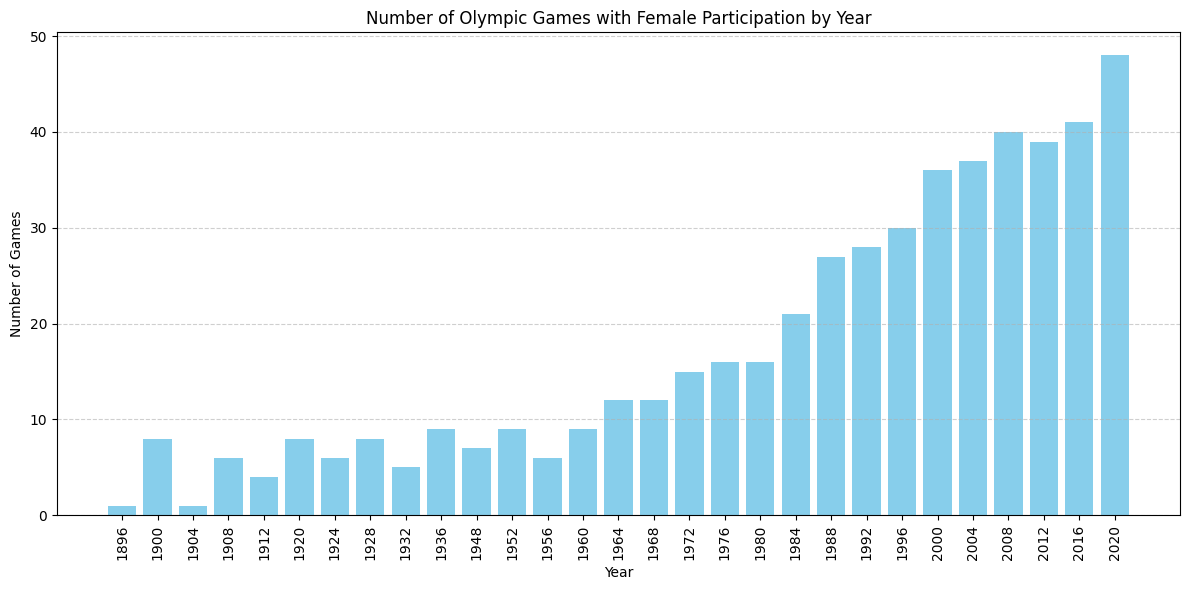

In [215]:


# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Olympic Games with Female Participation by Year')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot as an image
plt.savefig('female_participation_by_year.png')

plt.show()